# Lista Markov

### Nome: Hyago Vieira


> Exercício 1 - GATO E RATO
  - Um labirinto é composto de
 salas numeradas como mostrado na Figura a seguir. Um gato é colocado na sala
 e lá permanece. Um rato é colocado na sala
 no instante
 e a cada hora o rato se cansa de permanecer na mesma sala e vai para uma das salas vizinhas com igual probabilidade. A decisão do rato independe do caminho que ele percorreu até então (note que o rato pode voltar para uma sala em que já esteve). Infelizmente, se o rato for para a sala
 não sairá mais.
  
 c) Calcular a probabilidade de o rato morrer após
 3 horas e o número médio de passos para a absorção.

 d) Calcular número médio de passos para absorção.

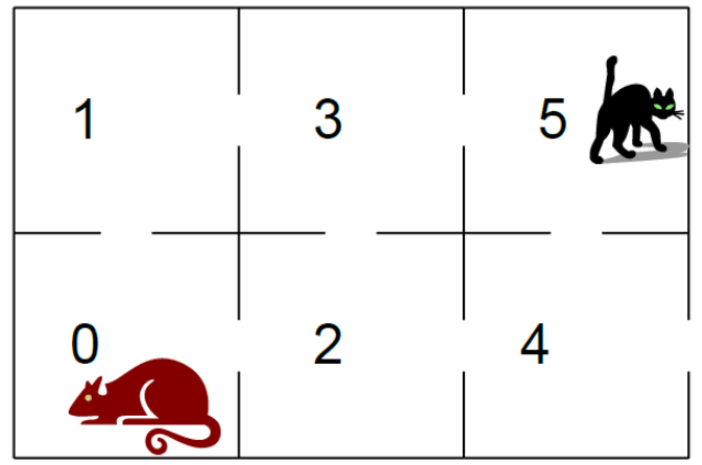

In [6]:
import numpy as np

num_simulacoes = 100000  # Número de simulações
tempo_morte = 3  # Tempo em horas até verificar a morte do rato
comprimento_cadeia = 50  # Número de transições na cadeia de Markov
passos_ate_absorcao = []  # Número de passos até o rato ser capturado pelo gato
estado_absorvente = 5  # Estado absorvente, onde o gato está

# Array para armazenar os estados após o tempo de morte em todas as simulações
resultados_cadeia_markov = np.zeros(num_simulacoes, int)

# Inicializa a matriz de transição com zeros
matriz_transicoes = np.zeros((6, 6))

# Define as transições para cada sala
matriz_transicoes[0, [1, 2]] = 1 / 2
matriz_transicoes[1, [0, 3]] = 1 / 2
matriz_transicoes[2, [0, 3, 4]] = 1 / 3
matriz_transicoes[3, [1, 2, 5]] = 1 / 3
matriz_transicoes[4, [2, 5]] = 1 / 2
matriz_transicoes[5, 5] = 1
matriz_transicoes

array([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333,
        0.        ],
       [0.        , 0.33333333, 0.33333333, 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [7]:
# Loop através de cada simulação
for i in range(num_simulacoes):
    # A posição inicial do rato é a casa 0 no instante t = 0
    cadeia_markov = np.zeros(comprimento_cadeia, int)

    for j in range(1, comprimento_cadeia):
        # Calcula as probabilidades acumuladas para a transição do estado atual com soma acumulativa
        transicoes_acumuladas = np.cumsum(matriz_transicoes[cadeia_markov[j - 1]])
        transicao = np.random.uniform(0, 1)

        # Determina o próximo estado com base na probabilidade acumulada
        proximo_estado = np.argmax(transicoes_acumuladas > transicao)
        cadeia_markov[j] = proximo_estado
        if proximo_estado == estado_absorvente:
            passos_ate_absorcao.append(j)
            break

    # Armazena o estado da cadeia no tempo especificado (tempo_morte)
    resultados_cadeia_markov[i] = cadeia_markov[tempo_morte]

# Cálculo das probabilidades usando a simulação de Monte Carlo
probabilidade_morte = np.sum(resultados_cadeia_markov == estado_absorvente) / num_simulacoes
print('A) A probabilidade de o rato ser capturado em ', tempo_morte, ' horas é de', probabilidade_morte, '\n')
print('B) Média de' , np.mean(passos_ate_absorcao), ' passos até a absorção.')

A) A probabilidade de o rato ser capturado em  3  horas é de 0.2225 

B) Média de 9.718334552230582  passos até a absorção.


> Exercício 2 - MOSCA E ARANHA
- Uma caixa possui  compartimentos, como mostrado na Figura a seguir. No compartimento há uma aranha, assim como no compartimento. Uma mosca pousa em um dos compartimentos. A cada minuto (se ela ainda não foi comida) a mosca decide se continua no mesmo compartimento ou se vai para um dos compartimentos vizinhos. A probabilidade de ficar no mesmo compartimento é e a probabilidade de ir para um compartimento vizinho é. Se a mosca vai para onde há uma aranha, ela não sai mais (fica presa na teia).

c) Calcular a probabilidade de a mosca no terceiro minuto ir no compartimento da aranha

d) Número médio de passos

e) Probabilidade de absorção associada a cada estado.

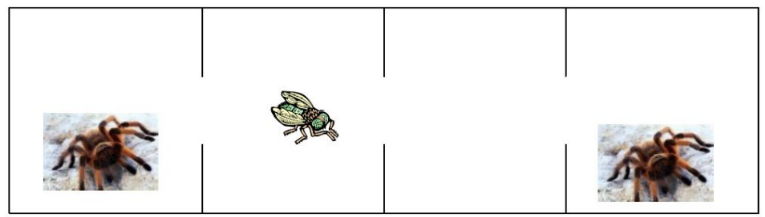

In [20]:
import numpy as np

num_experimentos = 100000  # Quantidade de experimentos

tempo_alvo = 3            # Tempo em que a mosca deve ser capturada pela aranha.
maximo_passos = 25        # Número máximo de passos na cadeia de Markov.
passos_ate_captura = [[], []]  # Número de passos até a captura.
estados_finais = [0, 3]       # Estados finais que têm uma aranha.

# Cadeia auxiliar para armazenar estados após exatamente tempo_alvo passos.
estado_apos_tempo_alvo = []                  # Estados no tempo tempo_alvo.
estados_finais_simulacao = np.zeros(num_experimentos, int)  # Estados finais após maximo_passos passos.
matriz_transicao = np.zeros((4, 4))
matriz_transicao[0, 0] = 1.0
matriz_transicao[0, 1] = 0.0
matriz_transicao[1, 0] = 0.3
matriz_transicao[1, 1] = 0.4
matriz_transicao[1, 2] = 0.3
matriz_transicao[2, 1] = 0.3
matriz_transicao[2, 2] = 0.4
matriz_transicao[2, 3] = 0.3
matriz_transicao[3, 3] = 1.0
matriz_transicao

array([[1. , 0. , 0. , 0. ],
       [0.3, 0.4, 0.3, 0. ],
       [0. , 0.3, 0.4, 0.3],
       [0. , 0. , 0. , 1. ]])

In [21]:

for experimento in range(num_experimentos):
    estado_inicial = np.argmax(np.cumsum([0, 0.5, 0.5, 0]) > np.random.uniform(0, 1))
    cadeia = np.zeros(maximo_passos, int)
    cadeia[0] = estado_inicial

    for j in range(1, maximo_passos):
        # Calculando as probabilidades cumulativas para o estado atual da cadeia de Markov:
        prob_cumulativas = np.cumsum(matriz_transicao[cadeia[j - 1]])
        numero_aleatorio = np.random.uniform(0, 1)

        # Determinando o próximo estado com base nas probabilidades:
        proximo_estado = np.argmax(prob_cumulativas > numero_aleatorio)
        cadeia[j] = proximo_estado

        if proximo_estado in estados_finais:
            # Verifica se a captura ocorre exatamente em tempo_alvo minutos:
            if j == tempo_alvo:
                estado_apos_tempo_alvo.append(j)
            if sum(len(lista) for lista in passos_ate_captura) != experimento:
                passos_ate_captura[estado_inicial - 1].append(j)
            break

    # A cadeia final é composta apenas pelos estados finais após a captura.
    estados_finais_simulacao[experimento] = cadeia[-1]

# Cálculo das probabilidades usando a simulação de Monte Carlo:
probabilidade_captura = np.sum(np.isin(estado_apos_tempo_alvo, estados_finais)) / num_experimentos
print('A probabilidade de a mosca ser capturada exatamente em ', tempo_alvo,' minutos é de ',probabilidade_captura*100,'% .\n')
for i, passos in enumerate(passos_ate_captura):
    print('Média de' ,np.mean(passos), ' passos para captura para o estado ', i + 1)


A probabilidade de a mosca ser capturada exatamente em  3  minutos é de  14.663 % .

Média de 3.3153501996268284  passos para captura para o estado  1
Média de 3.3445290996848698  passos para captura para o estado  2
